#***Trabajo Final de Estadistica***

Integrantes:

Antonio Jose Guerrero Lopez

Miguel Angel Tamara de la Rosa

Moisés Andrés Talaigua Berrio

Brayan Jesús Hernández Pacheco

Samuel David Perez Cervantes

Cristian Jose Almanza Garcia

Jaser Farid Perez Eschorboth

Emily Sofia Vargas Contreras

#**Nuestro grupo eligió la opcion numero 2 de trabajo final**

Con el fin de analizar el consumo energético de una empresa productora de acero se inspeccionaron durante cinco días cada una de las tres líneas de producción. En cada una de ellas se anotaron las variables más relevantes para las distintas horas del turno, salvo en la última hora donde sólo se inspeccionó durante cuatro días. En total se disponen de 117 mediciones recogidas en las siguientes variables:

**consumo** Consumo energético de la empresa (Megavatios·hora).

**ProdTotal** Producción total de acero (Toneladas de acero).

**pr.tbc** Producción del tren de bandas calientes (Toneladas de acero).

**pr.cc** Producción de colada continua (Toneladas de acero).

**pr.ca** Producción del convertidor de acero (Toneladas de acero).

**pr.galv1** Producción de galvanizado de tipo I (Tns. de acero).

**pr.galv2** Producción de galvanizado de tipo II (Tns. de acero).

**pr.pint** Producción de chapa pintada (Tns. de acero).

**linea** Línea de producción empleada (A, B o C).

**hora** Hora en la que se recogieron los datos (1ª, 2ª,. . . , 8ª).

**temperatura** Temperatura del sistema: alta (Alta), media (Media) y baja (Baja).

**averias** Presencia de averías (Sí, No).

**naverias** Número de averías detectadas.

**sistema** Activación de un sistema de detección de sobrecalentamiento: encendido (ON), apagado (OFF).


In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
A = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/acero.xlsx' )
A.sheet_names
acero = A.parse("acero")

**1.** Analice la relación lineal o no lineal entre las variables independientes: pr.tbc, pr.cc, pr.ca y el consumo:

**A.** Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad del consumo, con cada una de ellas.

**B.** Muestre los gráficos de dispersión y las regresiones lineales y verifique con la visualización de los residuales si estas regresiones lineales son consistentes.

**C.** Muestre los gráficos de las regresiones polinomiales de orden 2 (order=2), regresiones robustas (robust=True), y regresiones localizadas (lowes=True) y verifique con la visualización de los residuales si estas regresiones son consistentes.

**D.** Genere una variable dependiente a partir del consumo utilizando como punto de corte el tercer cuartil y realice regresiones logísticas (logistic=True)

**2.**Analice la relación lineal o no lineal entre las variables independientes: pr.galv1, pr.galv2, pr.pint y el consumo:

**F.** Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad del consumo, con cada una de ellas.

**G.** Muestre los gráficos de dispersión y las regresiones lineales y verifique con la visualización de los residuales si estas regresiones lineales son consistentes.

**H.** Muestre los gráficos de las regresiones polinomiales de orden 2 (order=2), regresiones robustas (robust=True), y regresiones localizadas (lowes=True) y verifique con la visualización de los residuales si estas regresiones son consistentes.

**I.** Genere una variable dependiente a partir del consumo utilizando como punto de corte el tercer cuartil y realice regresiones logísticas (logistic=True)



In [5]:
# Importo las funciones para probar la normalidad y la correlación
from scipy.stats import shapiro, pearsonr, spearmanr,kendalltau

#A) Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad de la ProdTotal, con cada una de ellas.

Iniciamos haciendo las pruebas de normalidad para las variables

In [6]:
stat, p = shapiro(acero['ProdTotal'])
# Shapiro-Wilk Test
# H0: SI ES NORMAL

In [7]:
stat, p

(0.9934109449386597, 0.8570712804794312)

**DECISIÓN:** Se puede observar que el valor de p es: 0.8570712804794312, que es >0.05  ; por lo cual H0 Es correcta y por ello se concluye que la  producción total de acero tiene distribución NORMAL

In [8]:
stat, p = shapiro(acero['pr.galv1'])

In [9]:
stat, p

(0.8692074418067932, 9.634030462279952e-09)

**DECISIÓN:** Se puede observar que el valor de p es: 9.634030462279952e-09, que es < 0.05 ; por lo cual H0 No es correcta y por ello se concluye que la Producción de galvanizado de tipo I No tiene distribución NORMAL

In [10]:
stat, p = shapiro(acero['pr.galv2'])

In [11]:
stat, p

(0.8588577508926392, 3.543812798767476e-09)

**DECISIÓN:** Se puede observar que el valor de p es: 3.543812798767476e-09, que es < 0.05 ; por lo cual H0 No es correcta y por ello se concluye que la Producción de galvanizado de tipo II No tiene distribución NORMAL

In [12]:
stat, p = shapiro(acero['pr.pint'])

In [13]:
stat, p

(0.6750818490982056, 9.713916140647455e-15)

**DECISIÓN:** Se puede observar que el valor de p es: 9.713916140647455e-15, que es < 0.05 ; por lo cual H0 No es correcta y por ello se concluye que la Producción de galvanizado de tipo II No tiene distribución NORMAL

**CONCLUSIÓN**

De las cuatro variables analizadas, solamente la producción total "ProdTotal" tiene distribución normal
Por esta razon no se puede utilizar prueba de pearsonr para las correlaciones
En su lugar usaremos spearman o kendall

Se toma la decisión de aplicar prueba de spearman

In [14]:
#Analizamos pr.galv1,

spearmanr(acero['pr.galv1'], acero['ProdTotal'])

#H0: No existe relacion lineal
#H1: Existe relacion lineal

SpearmanrResult(correlation=0.39478397035485013, pvalue=1.0594345192522123e-05)

**Desicion:** observamos que el parametro pvalue=1.0594345192522123e-05 < 0.05, Debido a esta razon el H0 queda rechazado,concluyendo que  si existe relacion lineal Entre las variables ; que por el valor del coeficiente parece ser una relacion lineal baja

In [15]:
#Analizamos pr.galv2,

spearmanr(acero['pr.galv2'], acero['ProdTotal'])

#H0: No existe relacion lineal
#H1: Existe relacion lineal

SpearmanrResult(correlation=0.14417719360267478, pvalue=0.12092910224656506)

**Desicion:** observamos que el parametro pvalue=0.12092910224656506 > 0.05, Debido a esta razon el H1 queda rechazado,concluyendo que  No existe relacion lineal Entre las variables

In [16]:
#Analizamos pr.pint,

spearmanr(acero['pr.pint'], acero['ProdTotal'])

#H0: No existe relacion lineal
#H1: Existe relacion lineal

SpearmanrResult(correlation=0.21652893351531136, pvalue=0.01903411156773199)

**Desicion:** observamos que el parametro pvalue=0.01903411156773199 < 0.05, Debido a esta razon el H0 queda rechazado,concluyendo que  si existe relacion lineal Entre las variables ; que por el valor del coeficiente parece ser una relacion lineal baja

#B) Muestre los gráficos de dispersión y las regresiones lineales y verifique con la visualización de los residuales si estas regresiones lineales son consistentes.

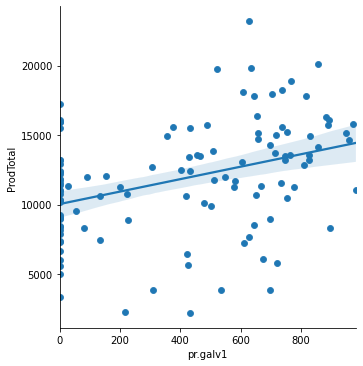

In [17]:
# Trazo el gráfico de dispersión y regresion lineal entre el prod.galv1 y el prodTotal
sns.relplot(x="pr.galv1",y="ProdTotal",data=acero)
sns.regplot(x="pr.galv1",y="ProdTotal",data=acero)

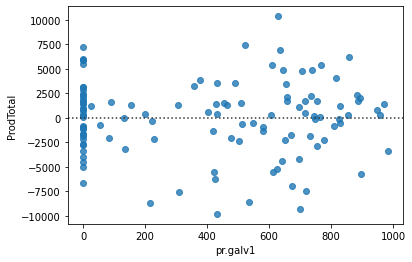

In [18]:
#Verificamos los residuales

sns.residplot(x="pr.galv1",y="ProdTotal",data=acero)

**Primera conclusión** 
Cuando se realizó la correlación entre Pr.galv1 y prodTotal, se obtuvo que existia una correlación con un coeficiente de 0.39478397035485013, lo cual se confirmo al ver la grafica; pudiendo percibir que existe una correlación lineal algo debil ( lo cual contrasta con la grafica al ver los puntos un poco dispersos) como ya se habia concluido de la hipotesis

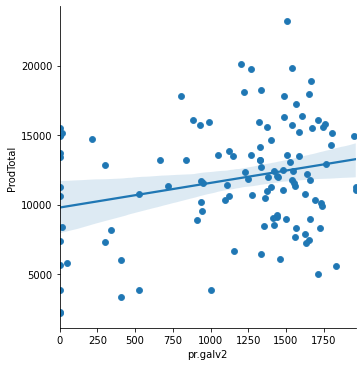

In [19]:
# Trazo el gráfico de dispersión y regresion lineal Entre el prodgalv2 y el prodTotal
sns.relplot(x="pr.galv2",y="ProdTotal",data=acero)
sns.regplot(x="pr.galv2",y="ProdTotal",data=acero)

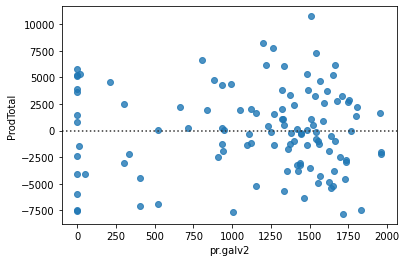

In [20]:
#Verificamos los residuales

sns.residplot(x="pr.galv2",y="ProdTotal",data=acero)

**Segunda conclusión** 
Cuando se realizó la correlación entre Pr.galv2 y prodTotal, se obtuvo que un coeficiente de 0.14417719360267478, lo cual se confirmo al ver el comportamiento de la grafica, donde los datos están muy dispersos; pudiendo percibir que No existe una correlación lineal

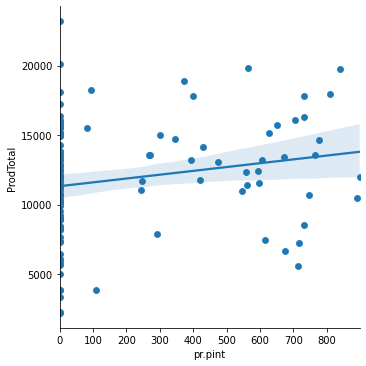

In [21]:
# Trazo el gráfico de dispersión y regresion lineal entre el pr.pint y el prodTotal
sns.relplot(x="pr.pint",y="ProdTotal",data=acero)
sns.regplot(x="pr.pint",y="ProdTotal",data=acero)

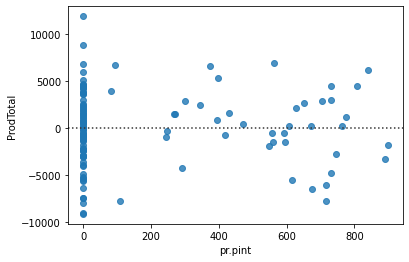

In [22]:
#Verificamos los residuales

sns.residplot(x="pr.pint",y="ProdTotal",data=acero)

**Tercera conclusión** 
Cuando se realizó la correlación entre Pr.pint y prodTotal, se obtuvo que un coeficiente de 0.21652893351531136, lo cual se confirmo un comportamiento que concuerda al ver la grafica; pudiendo percibir que existe una correlación lineal debil

#C) Muestre los gráficos de las regresiones polinomiales de orden 2 (order=2), regresiones robustas (robust=True), y regresiones localizadas (lowes=True) y verifique con la visualización de los residuales si estas regresiones son consistentes.

**Primeramente Analizamos la variable pr.galv1**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


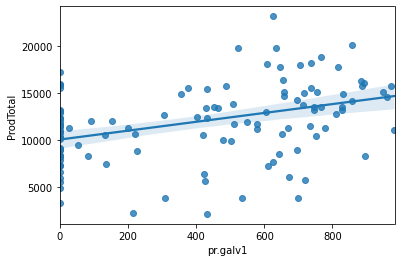

In [23]:
sns.regplot(x="pr.galv1",y="ProdTotal",data=acero,robust=True)              # robust = True 

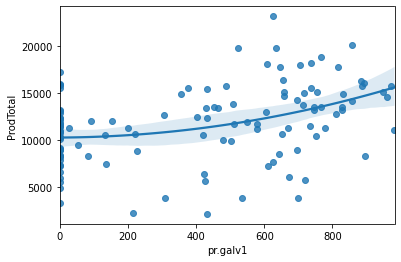

In [24]:
sns.regplot(x="pr.galv1",y="ProdTotal",data=acero,order=2)                 #order=2

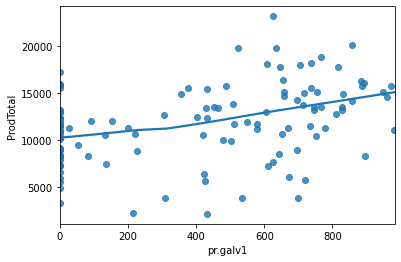

In [25]:
sns.regplot(x="pr.galv1",y="ProdTotal",data=acero,lowess=True)                  #lowess = True

**Analizamos la variable pr.galv2**

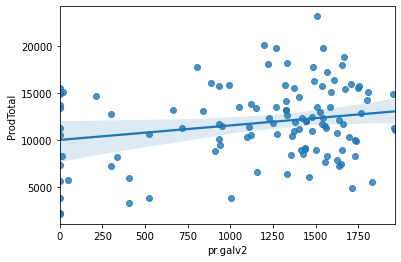

In [26]:
sns.regplot(x="pr.galv2",y="ProdTotal",data=acero,robust=True)              # robust = True 

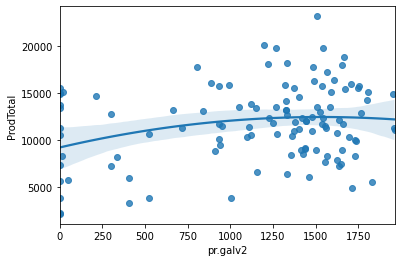

In [27]:
sns.regplot(x="pr.galv2",y="ProdTotal",data=acero,order=2)                    #order=2

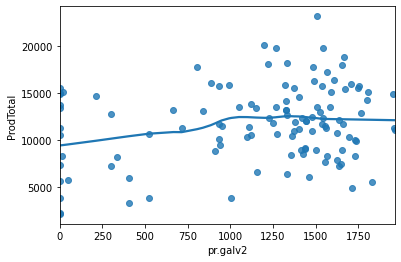

In [28]:
sns.regplot(x="pr.galv2",y="ProdTotal",data=acero,lowess=True)                  #lowess = True

**Analizamos la variable pr.Pint**

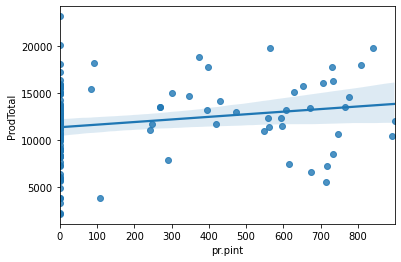

In [29]:
sns.regplot(x="pr.pint",y="ProdTotal",data=acero,robust=True)              # robust = True 

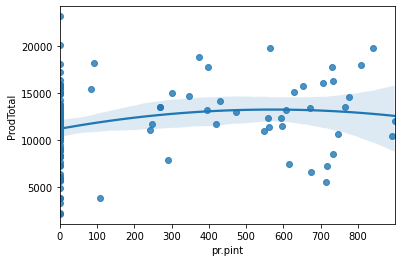

In [30]:
sns.regplot(x="pr.pint",y="ProdTotal",data=acero,order=2)                    #order=2

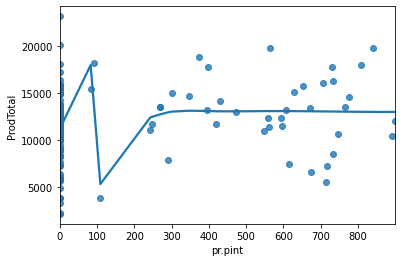

In [31]:
sns.regplot(x="pr.pint",y="ProdTotal",data=acero,lowess=True)                  #lowess = True

#D) Genere una variable dependiente a partir del consumo utilizando como punto de corte el tercer cuartil y realice regresiones logísticas (logistic=True)

Iniciamos definiendo una función que tenga como punto de corte inicial el tercer cuartil

In [32]:
PT = acero.ProdTotal.quantile(0.75)
PT

14908.0

In [33]:
acero['ProdTotalq3'] = acero.ProdTotal/acero['pr.galv1'] > PT

In [34]:
acero.head(5)

,consumo,pr.tbc,pr.cc,pr.ca,pr.galv1,pr.galv2,pr.pint,linea,hora,temperatura,averias,naverias,sistema,ProdTotal,NOx,CO,COV,SO2,CO2,N2O,ProdTotalq3
0,135.31,6840,830,0,579,1401,0,A,1º,Alta,Si,1,OFF,11266,0.4900,3.5450,0.5450,0.038,101.5000,6.35,False
1,84.08,443,903,58,611,1636,717,A,2º,Alta,No,0,OFF,7251,0.0725,2.8950,0.4250,0.047,63.5650,2.23,False
2,131.62,7270,572,36,982,1963,243,A,3º,Baja,No,0,OFF,11066,1.4900,5.0075,0.6900,0.062,98.8175,5.99,False
3,90.46,5031,694,122,896,1568,0,A,4º,Baja,No,0,ON,8311,1.7150,2.1600,0.3600,0.066,70.1825,3.66,False
4,120.04,9365,1054,157,403,1480,0,A,5º,Baja,No,0,OFF,12459,0.4650,4.8450,0.6625,0.086,88.5300,6.06,False


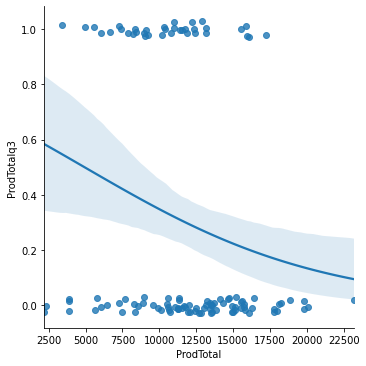

In [35]:
sns.lmplot(x= 'ProdTotal',y= 'ProdTotalq3', data = acero,logistic = True ,y_jitter=.03)

In [36]:
acero['ProdTotalq3'] = acero.ProdTotal/acero['pr.galv2'] > PT

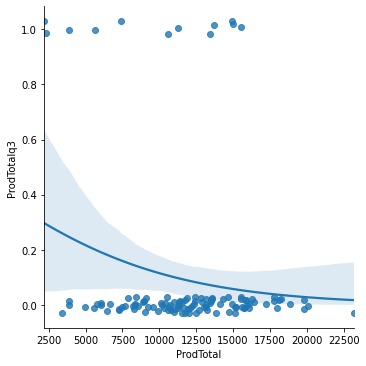

In [37]:
sns.lmplot(x= 'ProdTotal',y= 'ProdTotalq3', data = acero,logistic = True ,y_jitter=.03)

In [38]:
acero['ProdTotalq3'] = acero.ProdTotal/acero['pr.pint'] > PT

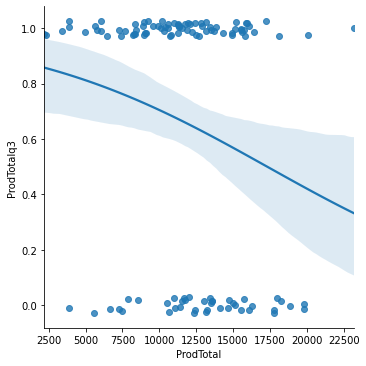

In [39]:
sns.lmplot(x= 'ProdTotal',y= 'ProdTotalq3', data = acero,logistic = True ,y_jitter=.03)

# E) Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad del consumo, con cada una de ellas.

In [40]:
stat, p = shapiro(acero['consumo'])
# Shapiro-Wilk Test
# H0: SI ES NORMAL

In [41]:
stat, p

(0.9925158619880676, 0.782966136932373)

Desicion: Como p =  0.782966136932373 y es > 0.05, la H0 es correcta, El consumo tiene una distribucion normal

In [42]:
# Para poder determinar las correlaciones debo determinar si las otras variables son o no normales, por tanto aplicamos el mismo razonamiento
stat, p = shapiro(acero['pr.tbc'])


In [43]:
stat , p

(0.8371171355247498, 5.001342118227114e-10)

Desicion: como p = 5.001342118227114e-10 < 0.05, Entonces no podemos tomar la H0 como correcta, por tanto este no tiene una distribucion normal

In [44]:
stat, p = shapiro(acero['pr.cc'])


In [45]:
stat, p

(0.7946226596832275, 1.701016758004492e-11)

 Desicion: Como p = 1.701016758004492e-11 < 0.05 , Entonces no podemos tomar H0 como correcta, por tanto no es una distribucion normal




In [46]:
stat, p = shapiro(acero['pr.ca'])

In [47]:
stat, p

(0.7792704105377197, 5.633276831118472e-12)

 Desicion: Como p = 5.633276831118472e-12 < 0.05 , Entonces no podemos tomar H0 como correcta, por tanto no es una distribucion normal


# F) Evalúe con pruebas de hipótesis si hay correlación lineal, previa evaluación de la normalidad del consumo, con cada una de ellas.

In [48]:
stat, p = shapiro(acero['consumo'])
# Shapiro-Wilk Test
# H0: SI ES NORMAL

In [49]:
stat, p

(0.9925158619880676, 0.782966136932373)

Desicion: Como p =  0.782966136932373 y es > 0.05, la H0 es correcta, El consumo tiene una distribucion normal

In [50]:
# Para poder determinar las correlaciones debo determinar si las otras variables son o no normales, por tanto aplicamos el mismo razonamiento
stat, p = shapiro(acero['pr.tbc'])


In [51]:
stat , p

(0.8371171355247498, 5.001342118227114e-10)

Desicion: como p = 5.001342118227114e-10 < 0.05, Entonces no podemos tomar la H0 como correcta, por tanto este no tiene una distribucion normal

In [52]:
stat, p = shapiro(acero['pr.cc'])


In [53]:
stat, p

(0.7946226596832275, 1.701016758004492e-11)

 Desicion: Como p = 1.701016758004492e-11 < 0.05 , Entonces no podemos tomar H0 como correcta, por tanto no es una distribucion normal




In [54]:
stat, p = shapiro(acero['pr.ca'])

In [55]:
stat, p

(0.7792704105377197, 5.633276831118472e-12)

 Desicion: Como p = 5.633276831118472e-12 < 0.05 , Entonces no podemos tomar H0 como correcta, por tanto no es una distribucion normal


# Conclusion: como la unica variable con distribucion normal es la de consumo, entonces no podemos usar a pearson para las correlaciones, usamos a spearman o kendall

In [56]:
#usaremos a spearmanr
#Empezamos con pr.tbc
spearmanr(acero['pr.tbc'], acero['consumo'])
#H0: No existe relacion lineal
#H1:existe relacion lineal

SpearmanrResult(correlation=0.7506861568030918, pvalue=1.9487386240905184e-22)

Desicion: Como pvalue=1.9487386240905184e-22 < 0.05, rechazamos la H0, por tanto si existe relacion lineal aunque parece ser moderada

In [57]:
spearmanr(acero['pr.cc'], acero['consumo'])
#H0: No existe relacion lineal
#H1:existe relacion lineal

SpearmanrResult(correlation=0.42099284674498233, pvalue=2.285196215968889e-06)

Desicion: Como pvalue=2.285196215968889e-06 < 0.05, rechazamos la H0, por tanto si existe relacion lineal, aunque parece ser baja

In [58]:
spearmanr(acero['pr.ca'], acero['consumo'])
#H0: No existe relacion lineal
#H1:existe relacion lineal

SpearmanrResult(correlation=-0.048961673059789726, pvalue=0.6001186442783657)

Desicion: Como pvalue=0.6001186442783657 > 0.05, rechazamos la H1, por tanto NO existe relacion lineal

# G) Muestre los gráficos de dispersión y las regresiones lineales y verifique con la visualización de los residuales si estas regresiones lineales son consistentes.

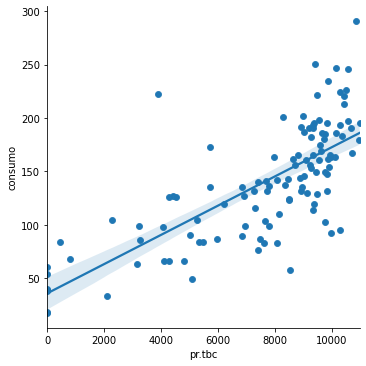

In [59]:
# Trazo el gráfico de dispersión y regresion lineal
sns.relplot(x="pr.tbc",y="consumo",data=acero)
sns.regplot(x="pr.tbc",y="consumo",data=acero)


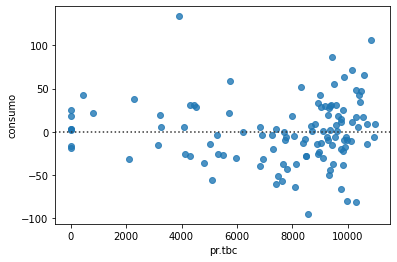

In [60]:
#Visualiso los residuales
sns.residplot(x="pr.tbc",y="consumo",data=acero)

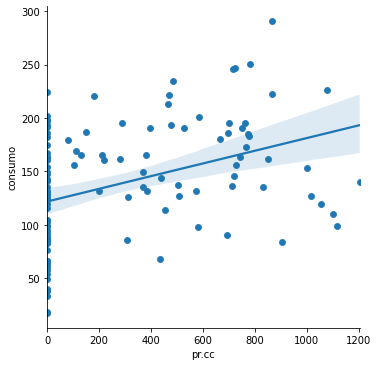

In [61]:
# Trazo el gráfico de dispersión y regresion lineal
sns.relplot(x="pr.cc",y="consumo",data=acero)
sns.regplot(x="pr.cc",y="consumo",data=acero)

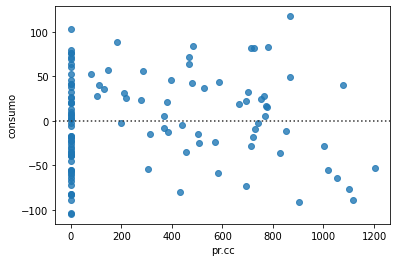

In [62]:
#Visualiso los residuales
sns.residplot(x="pr.cc",y="consumo",data=acero)

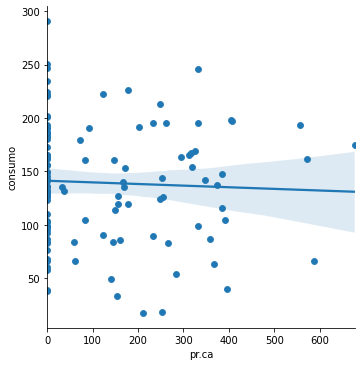

In [63]:
# Trazo el gráfico de dispersión y regresion lineal
sns.relplot(x="pr.ca",y="consumo",data=acero)
sns.regplot(x="pr.ca",y="consumo",data=acero)

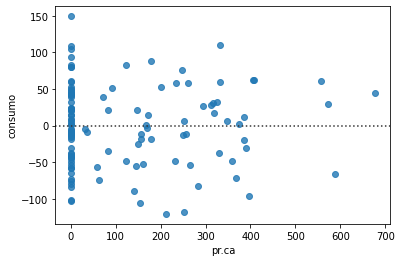

In [64]:
#Visualiso los residuales
sns.residplot(x="pr.ca",y="consumo",data=acero)

# H) Muestre los gráficos de las regresiones polinomiales de orden 2 (order=2), regresiones robustas (robust=True), y regresiones localizadas (lowes=True) y verifique con la visualización de los residuales si estas regresiones son consistentes.

Primero con la variable pr.tbc

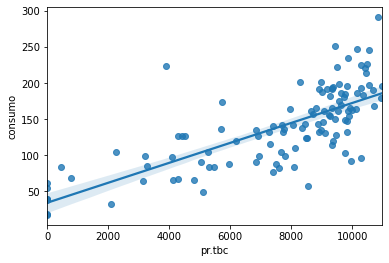

In [65]:
# robust = True 
sns.regplot(x="pr.tbc",y="consumo",data=acero,robust=True)

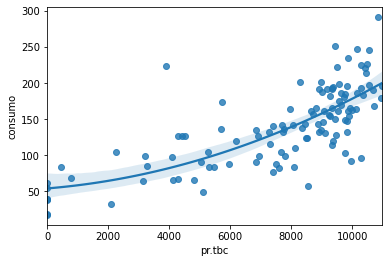

In [66]:
#order=2
sns.regplot(x="pr.tbc",y="consumo",data=acero,order=2)

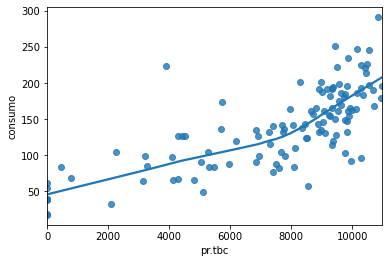

In [67]:
#lowess = True
sns.regplot(x="pr.tbc",y="consumo",data=acero,lowess=True)

Segundo con la variable pr.cc

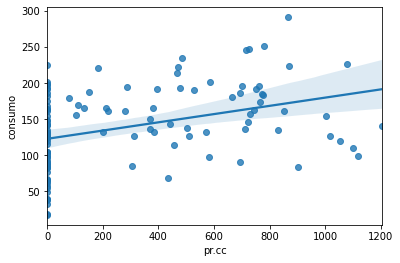

In [68]:
# robust = True 
sns.regplot(x="pr.cc",y="consumo",data=acero,robust=True)

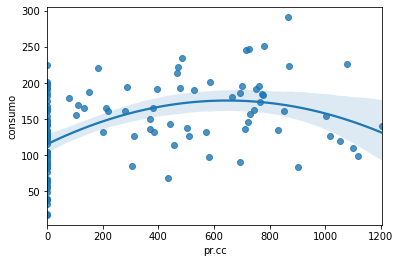

In [69]:
#order=2
sns.regplot(x="pr.cc",y="consumo",data=acero,order=2)

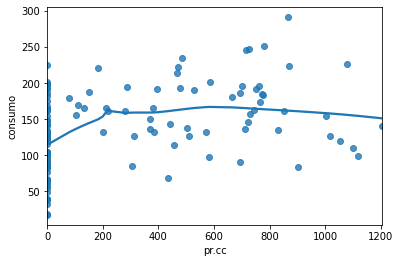

In [70]:
#lowess = True
sns.regplot(x="pr.cc",y="consumo",data=acero,lowess=True)

Tercero con la variable Pr.ca

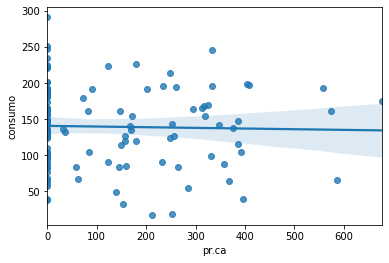

In [71]:
# robust = True 
sns.regplot(x="pr.ca",y="consumo",data=acero,robust=True)

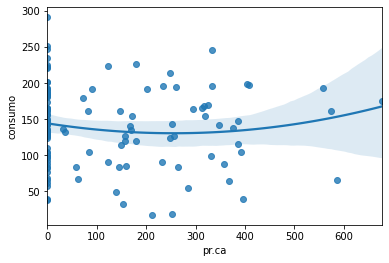

In [72]:
#order=2
sns.regplot(x="pr.ca",y="consumo",data=acero,order=2)

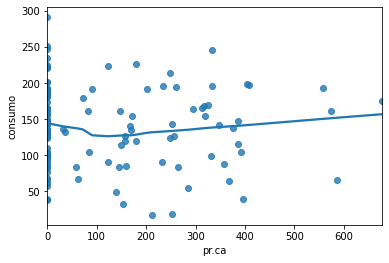

In [73]:
#lowess = True
sns.regplot(x="pr.ca",y="consumo",data=acero,lowess=True)

# I) Genere una variable dependiente a partir del consumo utilizando como punto de corte el tercer cuartil y realice regresiones logísticas (logistic=True)

In [82]:
c = acero.consumo.quantile(0.75)
c

182.48

In [83]:
acero['consumoq3'] = acero.consumo/acero['pr.cc'] > c

In [84]:
acero.head(3)

,consumo,pr.tbc,pr.cc,pr.ca,pr.galv1,pr.galv2,pr.pint,linea,hora,temperatura,averias,naverias,sistema,ProdTotal,NOx,CO,COV,SO2,CO2,N2O,ProdTotalq3,consumoq3
0,135.31,6840,830,0,579,1401,0,A,1º,Alta,Si,1,OFF,11266,0.4900,3.5450,0.545,0.038,101.5000,6.35,True,False
1,84.08,443,903,58,611,1636,717,A,2º,Alta,No,0,OFF,7251,0.0725,2.8950,0.425,0.047,63.5650,2.23,False,False
2,131.62,7270,572,36,982,1963,243,A,3º,Baja,No,0,OFF,11066,1.4900,5.0075,0.690,0.062,98.8175,5.99,False,False


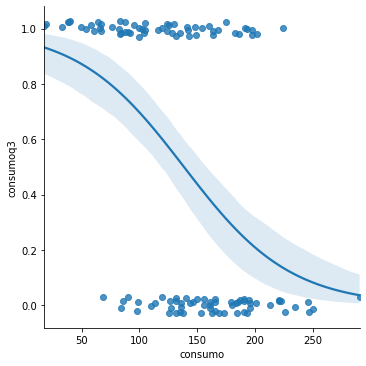

In [85]:
sns.lmplot(x= 'consumo',y= 'consumoq3', data = acero,logistic = True ,y_jitter=.03)

In [86]:
acero['consumoq3'] = acero.consumo/acero['pr.ca'] > c

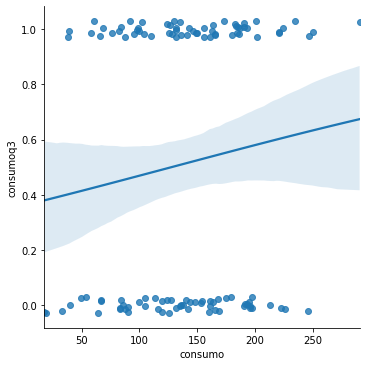

In [87]:
sns.lmplot(x= 'consumo',y= 'consumoq3', data = acero,logistic = True ,y_jitter=.03)


In [88]:
acero['consumoq3'] = acero.consumo/acero['pr.tbc'] > c

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)


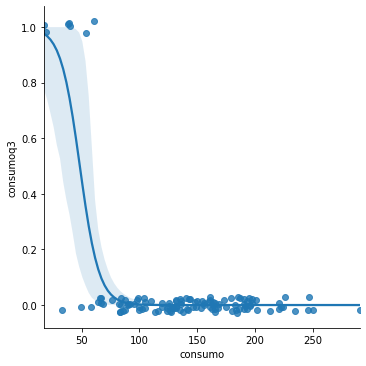

In [89]:
sns.lmplot(x= 'consumo',y= 'consumoq3', data = acero,logistic = True ,y_jitter=.03)
